In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [234]:
df_raw=pd.read_csv('raw_data/kaggle_survey_2022_responses.csv',low_memory=False,header=[1])

In [235]:
df_raw.columns.values

array(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'Are you currently a student? (high school, university, or graduate)',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai',
       'On which platforms have you begun or completed data science courses? (Select all tha

In [236]:
# 교육 플랫폼
df_edu_platforms=df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('On which platforms have you begun or completed data science courses?')]]

# 가장 도움된 교육자료
df_edu_products = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('What products or platforms did you find to be most helpful when you first started studying data science?')]]

# 주사용 언어
df_programming_lang = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('What programming languages do you use on a regular basis?')]]

# 주사용 ide
df_ide = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith("Which of the following integrated development environments (IDE's) do you use on a regular basis?")]]

# 주사용 클라우드 주피터노트북(colab 등)
df_host_notebook = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following hosted notebook products?')]]

# 주 시각화 툴
df_visualize = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following data visualization libraries on a regular basis?')]]

# 주 ml 툴
df_framework = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following machine learning frameworks do you use on a regular basis?')]]

# 주 computer_vision 툴
df_computer_vision = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which categories of computer vision methods do you use on a regular basis?')]]

# 주사용 ml 알고리즘
df_ml_algo = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following ML algorithms do you use on a regular basis?')]]

# 주사용 자연어처리 툴
df_nlp = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following natural language processing (NLP) methods do you use on a regular basis?')]]

# 주사용 학습된 모델
df_pretrained = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you download pre-trained model weights from any of the following services?')]]

# 회사 주요 직책
df_main_role = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Select any activities that make up an important part of your role at work')]]

# 주 사용 클라우드 플랫폼
df_cloud_platform = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following cloud computing platforms do you use?')]]

# 주 사용 클라우드 계산 플랫폼
df_cloud_product = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following cloud computing products?')]]

# 주 데이터 저장소
df_data_storage = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following data storage products')]]

# 주 sql
df_data_product = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following data products')]]

# 주 ml cloud product(sage maker)
df_ml_product = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following managed machine learning products on a regular basis?')]]

# 주 automated ml
df_automated_ml = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following automated machine learning tools?')]]

# 주 model 제공 방법
df_model_serve = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following products to serve your machine learning models?')]]

# 주 model monitor 방법
df_model_checker = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any tools to help monitor your machine learning models and/or experiments?')]]

# 주요 사용 하드웨어
df_ml_hardware = df_raw.loc[:,[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following types of specialized hardware when training machine learning models?')]]


In [240]:
df_li=[df_edu_platforms,
df_edu_products ,
df_programming_lang ,
df_ide ,
df_host_notebook ,
df_visualize ,
df_framework ,
df_computer_vision ,
df_ml_algo ,
df_nlp ,
df_pretrained ,
df_main_role ,
df_cloud_platform ,
df_cloud_product ,
df_data_storage ,
df_data_product ,
df_ml_product ,
df_automated_ml ,
df_model_serve ,
df_model_checker ,
df_ml_hardware ,]

In [242]:
df_cleaned = list()
for df in df_li:
    df.columns=[i.split('Selected Choice')[-1].split('(')[0] for i in df.columns]
    df=pd.DataFrame(df_edu_products.count(),columns=['count'])
    df_cleaned.append(df)

In [221]:
# 학계 페이퍼 제출 경험
df_paper=pd.DataFrame(df_raw.loc[:,'Have you ever published any academic research (papers, preprints, conference proceedings, etc)?'].value_counts())
# 코딩 경력
df_coding_time=pd.DataFrame(df_raw.loc[:,'For how many years have you been writing code and/or programming?'].value_counts())
# ml 경력
df_ml_time=pd.DataFrame(df_raw.loc[:,'For how many years have you used machine learning methods?'].value_counts())
# 직종
df_job=pd.DataFrame(df_raw.loc[:,'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts())
# 나라
df_country=pd.DataFrame(df_raw.loc[:,'In which country do you currently reside?'].value_counts())
# 성별
df_sex=pd.DataFrame(df_raw.loc[:,'What is your gender? - Selected Choice'].value_counts())
# 나이
df_age=pd.DataFrame(df_raw.loc[:,'What is your age (# years)?'].value_counts())
# 연봉
df_yearly_compensation=pd.DataFrame(df_raw.loc[:,'What is your current yearly compensation (approximate $USD)?'].value_counts())

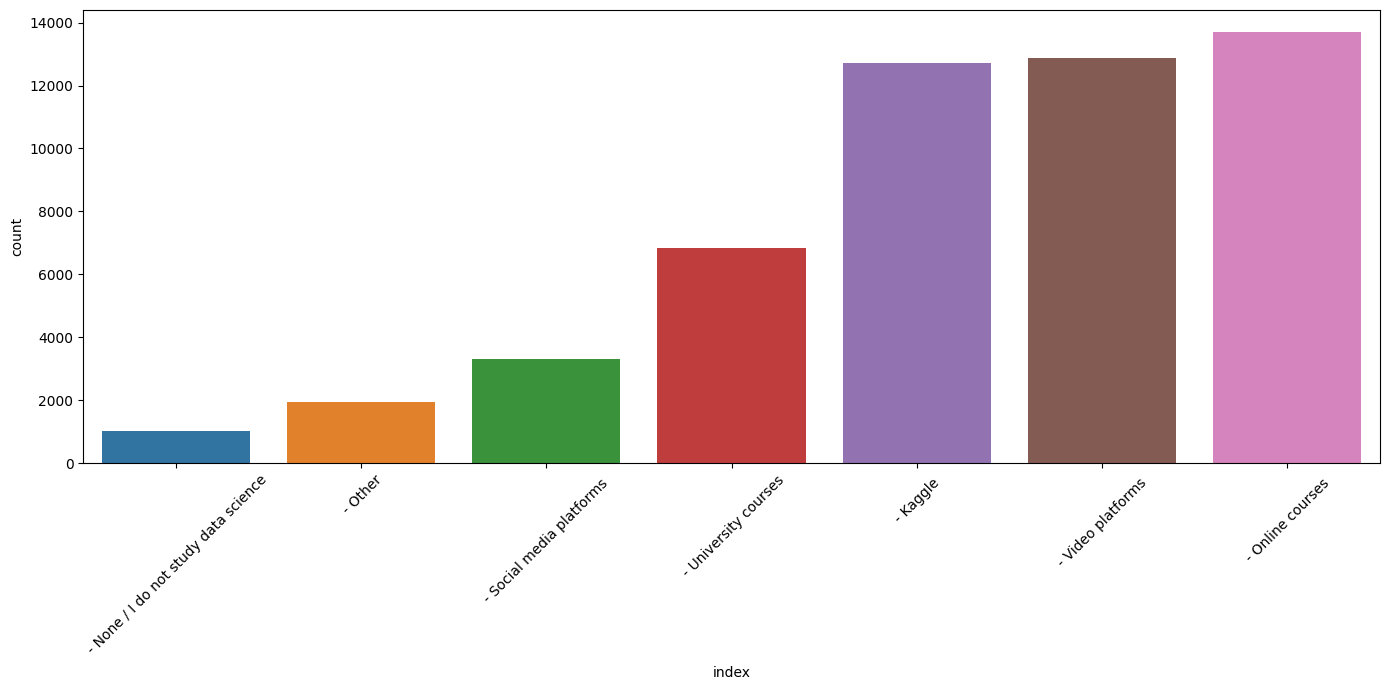

In [163]:
df_edu_products.columns=[i.split('Selected Choice')[-1].split('(')[0] for i in df_edu_products.columns]

pd.DataFrame(df_edu_products.count(),columns=['count'])

plt.figure(figsize=(14,7))
sns.barplot(data=pd.DataFrame(df_edu_products.count(),columns=['count']).reset_index().sort_values('count'),
            x='index',
            y='count')
plt.xticks(rotation=45)
plt.tight_layout()

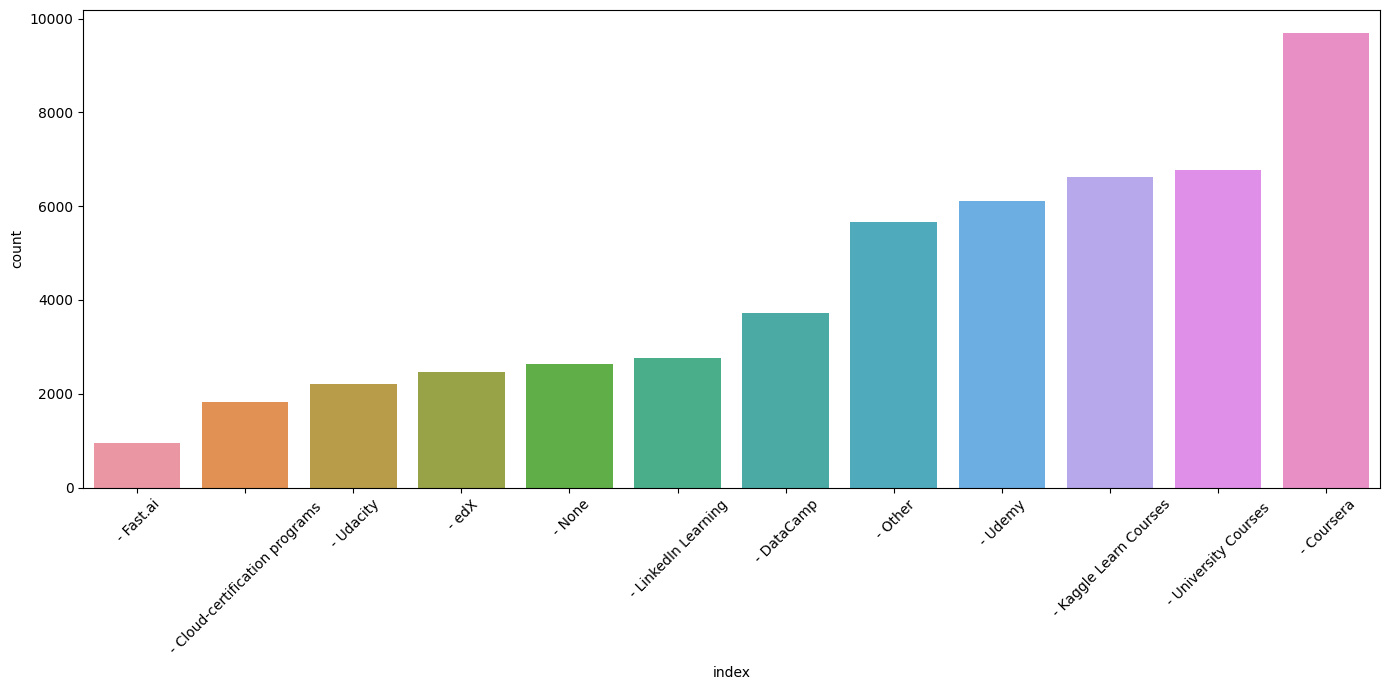

In [164]:
df_edu_platforms.columns=[i.split('Selected Choice')[-1].split('(')[0] for i in df_edu_platforms.columns ]

pd.DataFrame(df_edu_platforms.count(),columns=['count'])

plt.figure(figsize=(14,7))
sns.barplot(data=pd.DataFrame(df_edu_platforms.count(),columns=['count']).reset_index().sort_values('count'),
            x='index',
            y='count')
plt.xticks(rotation=45)
plt.tight_layout()

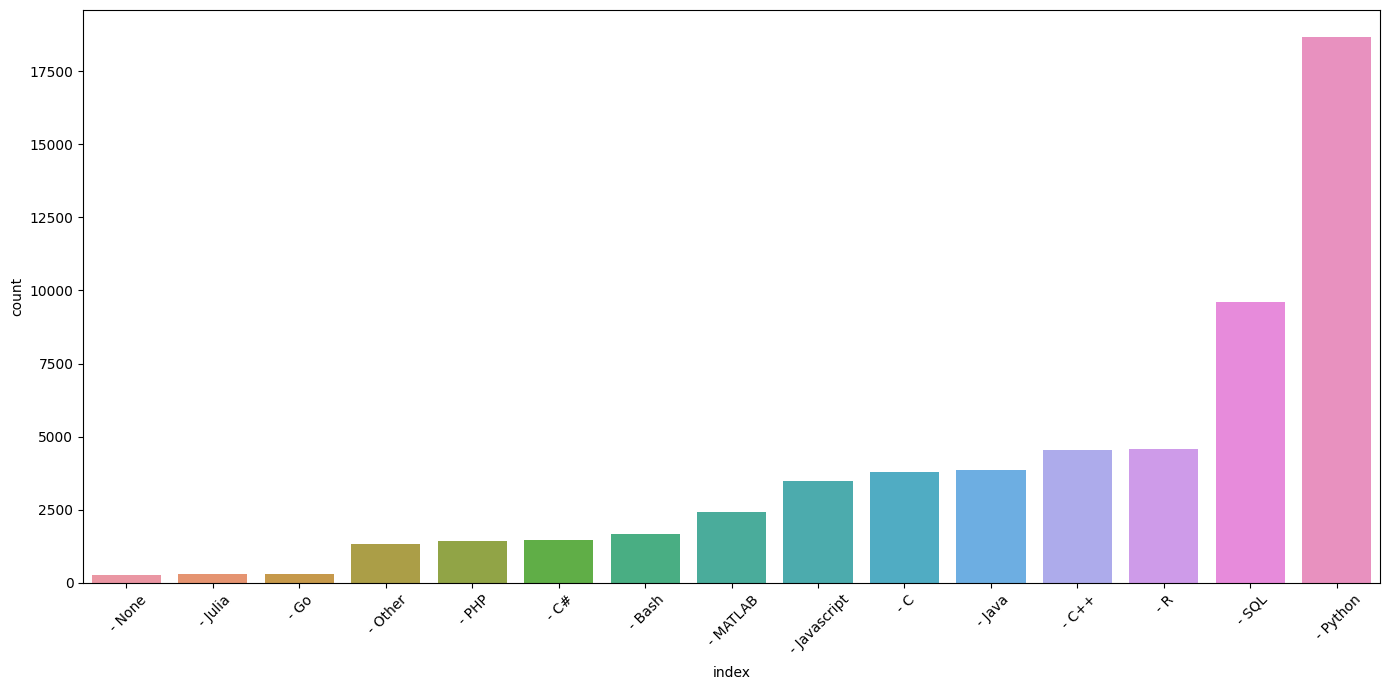

In [165]:
df_programming_lang.columns=[i.split('Selected Choice')[-1] for i in df_programming_lang.columns ]

pd.DataFrame(df_programming_lang.count(),columns=['count'])

plt.figure(figsize=(14,7))
sns.barplot(data=pd.DataFrame(df_programming_lang.count(),columns=['count']).reset_index().sort_values('count'),
            x='index',
            y='count')
plt.xticks(rotation=45)
plt.tight_layout()

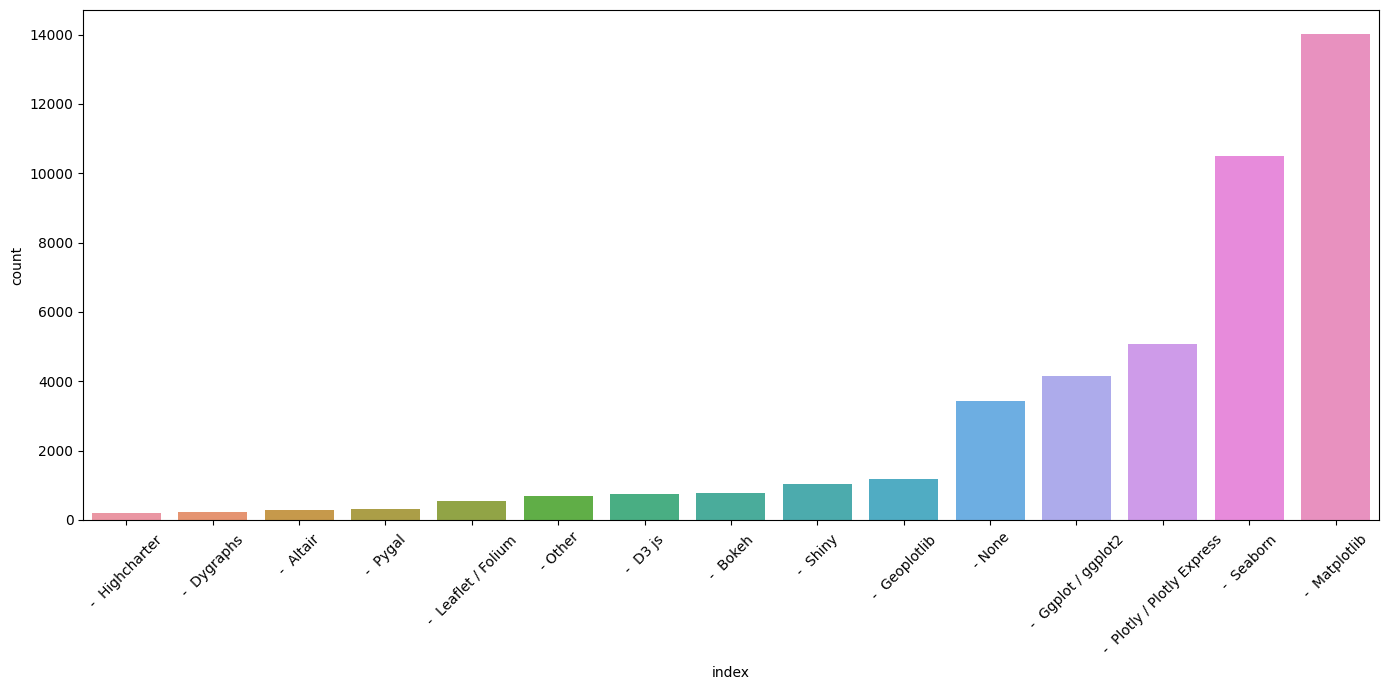

In [166]:
df_visualize.columns=[i.split('Selected Choice')[-1] for i in df_visualize.columns ]

pd.DataFrame(df_visualize.count(),columns=['count'])

plt.figure(figsize=(14,7))
sns.barplot(data=pd.DataFrame(df_visualize.count(),columns=['count']).reset_index().sort_values('count'),
            x='index',
            y='count')
plt.xticks(rotation=45)
plt.tight_layout()

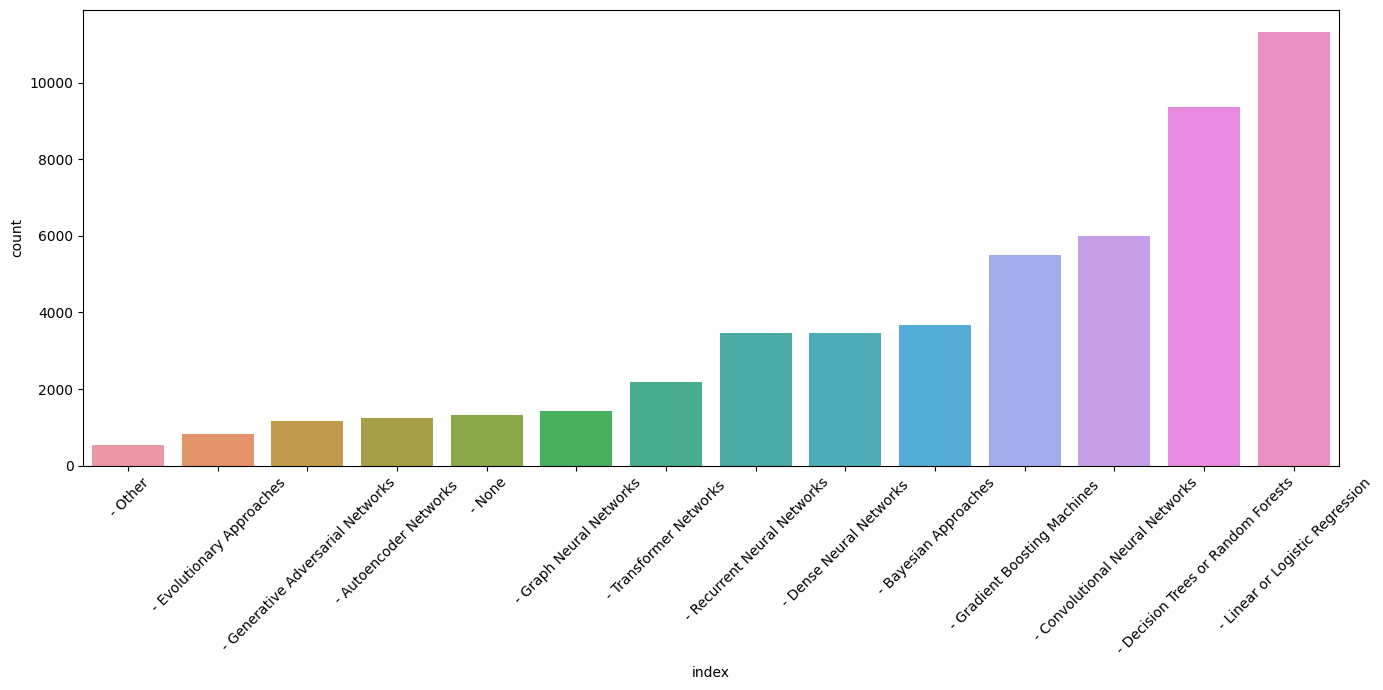

In [167]:
df_most_algo.columns=[i.split('Selected Choice')[-1].split('(')[0] for i in df_most_algo.columns ]

pd.DataFrame(df_most_algo.count(),columns=['count'])

plt.figure(figsize=(14,7))
sns.barplot(data=pd.DataFrame(df_most_algo.count(),columns=['count']).reset_index().sort_values('count'),
            x='index',
            y='count')
plt.xticks(rotation=45)
plt.tight_layout()

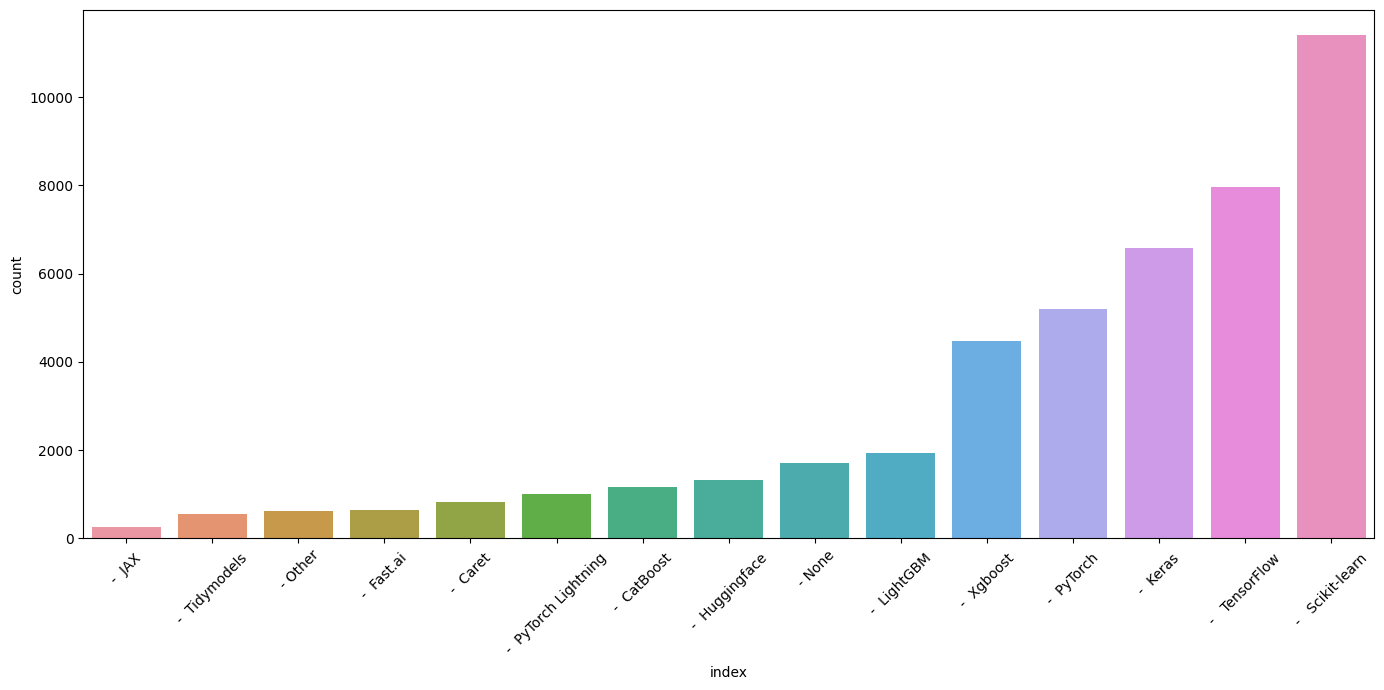

In [168]:
df_framework.columns=[i.split('Selected Choice')[-1] for i in df_framework.columns ]

pd.DataFrame(df_framework.count(),columns=['count'])

plt.figure(figsize=(14,7))
sns.barplot(data=pd.DataFrame(df_framework.count(),columns=['count']).reset_index().sort_values('count'),
            x='index',
            y='count')
plt.xticks(rotation=45)
plt.tight_layout()

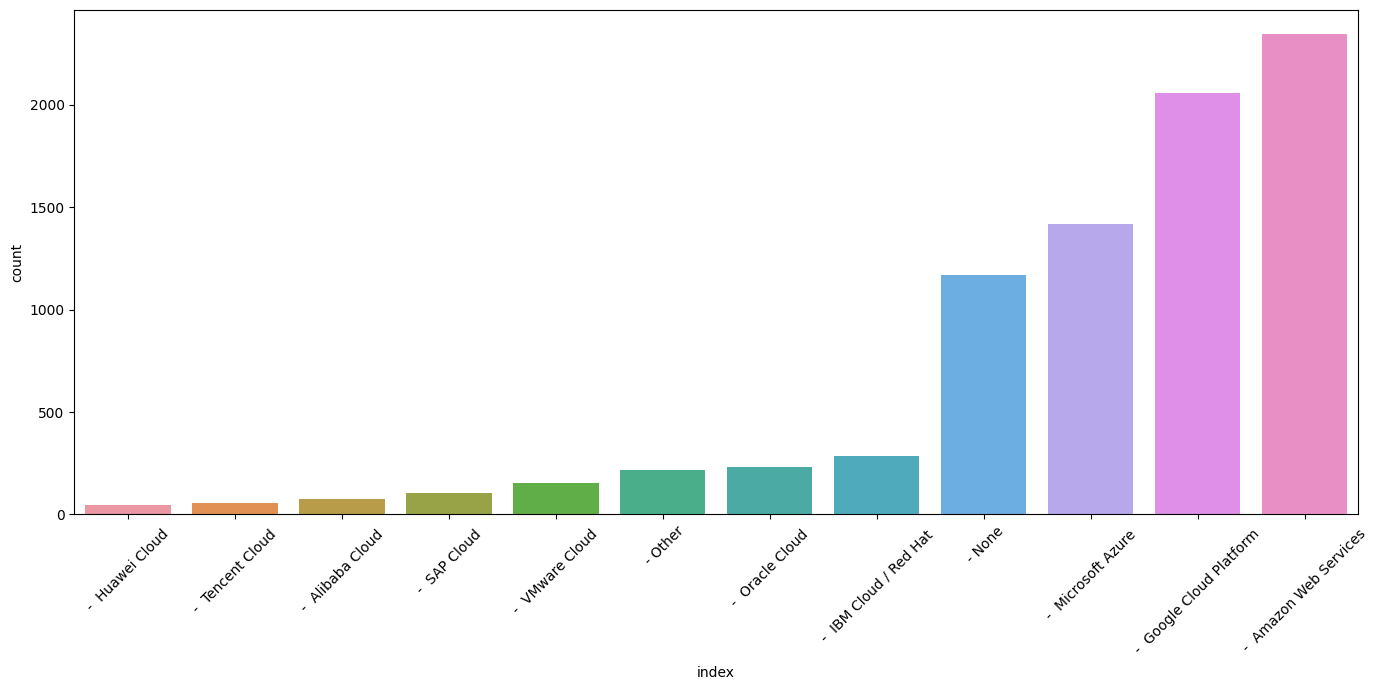

In [169]:
df_cloud_platform.columns=[i.split('Selected Choice')[-1].split('(')[0] for i in df_cloud_platform.columns ]

pd.DataFrame(df_cloud_platform.count(),columns=['count'])

plt.figure(figsize=(14,7))
sns.barplot(data=pd.DataFrame(df_cloud_platform.count(),columns=['count']).reset_index().sort_values('count'),
            x='index',
            y='count')
plt.xticks(rotation=45)
plt.tight_layout()

In [170]:
pd.DataFrame(df_framework.count(),columns=['count'])

,count
- Scikit-learn,11403
- TensorFlow,7953
- Keras,6575
- PyTorch,5191
- Fast.ai,648
- Xgboost,4477
- LightGBM,1940
- CatBoost,1165
- Caret,821
- Tidymodels,547


In [183]:
df_main_role.columns=[i.split('Select all that apply')[-1] for i in df_main_role.columns ]

In [185]:
df_main_role.columns = [i[3:] for i in df_main_role.columns]

In [187]:
pd.DataFrame(df_framework.count(),columns=['count']).to_csv('cleand_data/df_framework.csv')
pd.DataFrame(df_main_role.count(),columns=['count']).to_csv('cleand_data/df_main_role.csv')
pd.DataFrame(df_edu_products.count(),columns=['count']).to_csv('cleand_data/df_edu_products.csv')
pd.DataFrame(df_edu_platforms.count(),columns=['count']).to_csv('cleand_data/df_edu_platforms.csv')
pd.DataFrame(df_cloud_platform.count(),columns=['count']).to_csv('cleand_data/df_cloud_platform.csv')

In [188]:
pd.DataFrame(df_raw.loc[:,'What is your gender? - Selected Choice'].value_counts()).to_csv('cleand_data/df_gender.csv')

In [189]:
pd.DataFrame(df_raw.loc[:,'What is your age (# years)?'].value_counts()).to_csv('cleand_data/df_age.csv')

In [190]:
pd.DataFrame(df_raw.loc[:,'In which country do you currently reside?'].value_counts()).to_csv('cleand_data/df_country.csv')

In [178]:
df_raw.columns.values

array(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'Are you currently a student? (high school, university, or graduate)',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai',
       'On which platforms have you begun or completed data science courses? (Select all tha

In [179]:
[i for i in df_raw.iloc[:,5:].columns if i.startswith('Which of the following integrated development')]

["Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - JupyterLab ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  RStudio ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Visual Studio Code (VSCode) ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -  PyCharm ",
 "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice -   Spyder  ",
 "Which of the following inte

In [180]:
[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following hosted')]

['Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Kaggle Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Colab Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Azure Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Code Ocean ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  IBM Watson Studio ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio Lab ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon

In [181]:
[i for i in df_raw.iloc[:,5:].columns if i.startswith('Do you use any of the following')]

['Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Kaggle Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Colab Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - Azure Notebooks',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Code Ocean ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  IBM Watson Studio ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon Sagemaker Studio Lab ',
 'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Amazon

In [182]:
df_raw.columns.values

array(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'Are you currently a student? (high school, university, or graduate)',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai',
       'On which platforms have you begun or completed data science courses? (Select all tha